**Human Cognitive Performance**

As I delve into the realm of human cognitive performance, it becomes apparent that this complex phenomenon encompasses various higher-order brain functions. These include:

* **Attention**: The capacity to selectively focus on relevant stimuli while filtering out distractions

* **Memory**: The ability to encode, retain, and recall information, both in the short-term and long-term
* **Executive Function**: A set of skills that enable planning, decision-making, problem-solving, and cognitive flexibility
* **Processing Speed**: The rate at which the brain perceives and reacts to information
* **Learning**: The ability to acquire and apply new knowledge or skills
* **Perception**: The process of interpreting sensory input to understand the environment

Several key factors have been identified as influencing cognitive performance, including:

* **Age**: Cognitive abilities tend to peak in early adulthood and decline with age, although certain skills like crystallized intelligence may remain stable or improve

* **Gender**: Research suggests that there may be differences in verbal fluency and spatial cognition between men and women, although individual variability is significant
* **Sleep Duration**: Insufficient sleep has been shown to impair attention, memory consolidation, and decision-making, while optimal sleep (7-9 hours for adults) enhances learning and problem-solving
* **Stress Level**: Acute stress may temporarily boost focus, but chronic stress can damage the hippocampus and impair executive function
* **Diet Type**: A Mediterranean or balanced diet rich in healthy fats and antioxidants supports brain health, while a high-sugar or processed diet may contribute to brain fog and inflammation
* **Daily Screen Time**: Excessive screen time, particularly social media use, can reduce attention span and disrupt sleep, while productive screen use (e.g., learning apps) may enhance certain cognitive skills
* **Exercise Frequency**: Regular physical activity has been shown to boost blood flow to the brain, improve memory, and stimulate neurogenesis, while a sedentary lifestyle is associated with faster cognitive decline
* **Caffeine Intake**: Moderate caffeine consumption (approximately 200-400 mg/day) can enhance alertness and reaction time, but excessive intake can lead to negative effects such as jitteriness and impaired focus

Two key metrics that can be used to assess cognitive performance are:

* **Reaction Time**: A direct measure of processing speed and attentional control, with slower reaction times potentially indicating fatigue, aging, or cognitive overload

* **Memory Test Score**: A reflection of working memory, recall ability, and learning efficiency, which can be influenced by factors such as sleep, stress, diet, and mental exercise

It is clear that human cognitive performance is influenced by a complex interplay of biological, psychological, environmental, and lifestyle factors. Further analysis is needed to fully understand the relationships between these factors and to identify potential strategies for optimizing cognitive performance.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module=".*")
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
plt.switch_backend('agg')
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, PassiveAggressiveRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('/kaggle/input/human-cognitive-performance-analysis/human_cognitive_performance.csv')
df.head()

User_ID  Age  Gender  Sleep_Duration  Stress_Level       Diet_Type  \
0      U1   57  Female             6.5             3  Non-Vegetarian   
1      U2   39  Female             7.6             9  Non-Vegetarian   
2      U3   26    Male             8.2             6      Vegetarian   
3      U4   32    Male             7.8             9      Vegetarian   
4      U5   50    Male             9.7             2  Non-Vegetarian   

   Daily_Screen_Time Exercise_Frequency  Caffeine_Intake  Reaction_Time  \
0                6.5             Medium               41         583.33   
1               10.8               High              214         368.24   
2                5.7                Low              429         445.21   
3                8.3                Low              464         286.33   
4               11.3             Medium              365         237.65   

   Memory_Test_Score  Cognitive_Score  AI_Predicted_Score  
0                 65            36.71               39.77  
1                 58            54.35               57.68  
2                 49            32.57               29.54  
3                 94            70.15               74.59  
4                 62            87.54               91.78

In [4]:
df.isna().sum()

User_ID               0
Age                   0
Gender                0
Sleep_Duration        0
Stress_Level          0
Diet_Type             0
Daily_Screen_Time     0
Exercise_Frequency    0
Caffeine_Intake       0
Reaction_Time         0
Memory_Test_Score     0
Cognitive_Score       0
AI_Predicted_Score    0
dtype: int64

In [5]:
df.dtypes

User_ID                object
Age                     int64
Gender                 object
Sleep_Duration        float64
Stress_Level            int64
Diet_Type              object
Daily_Screen_Time     float64
Exercise_Frequency     object
Caffeine_Intake         int64
Reaction_Time         float64
Memory_Test_Score       int64
Cognitive_Score       float64
AI_Predicted_Score    float64
dtype: object

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

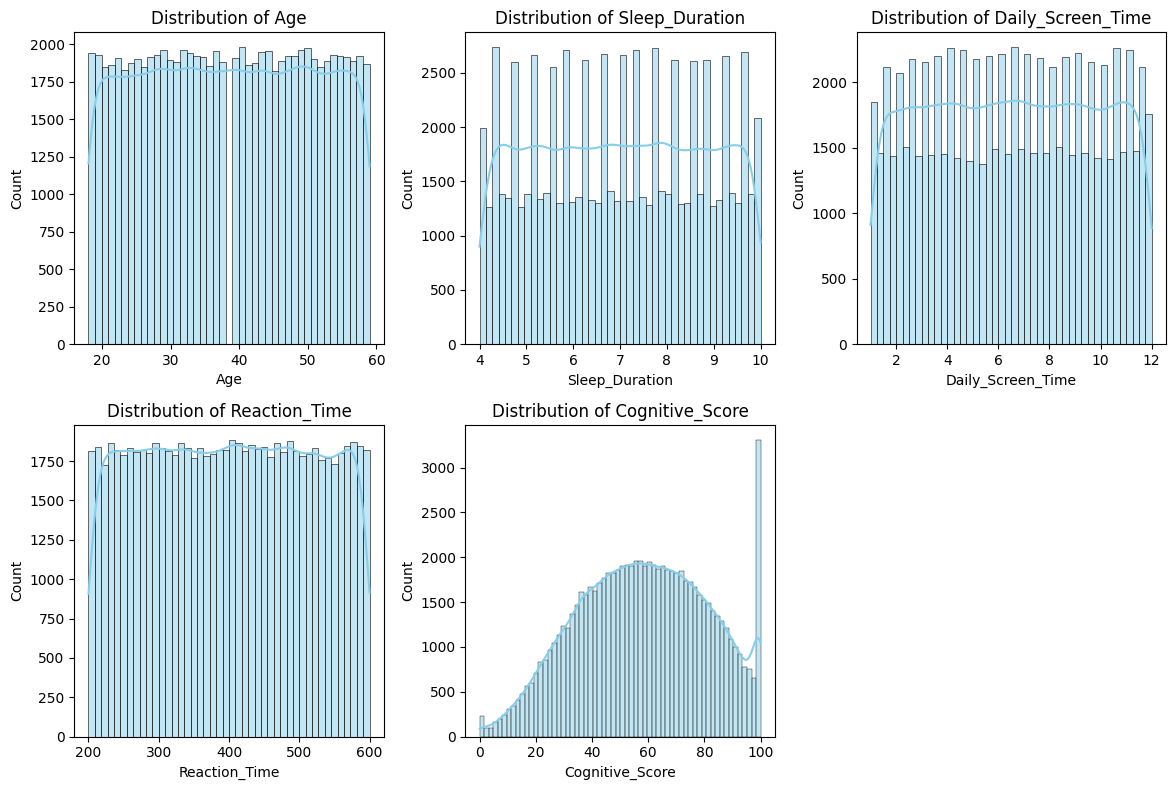

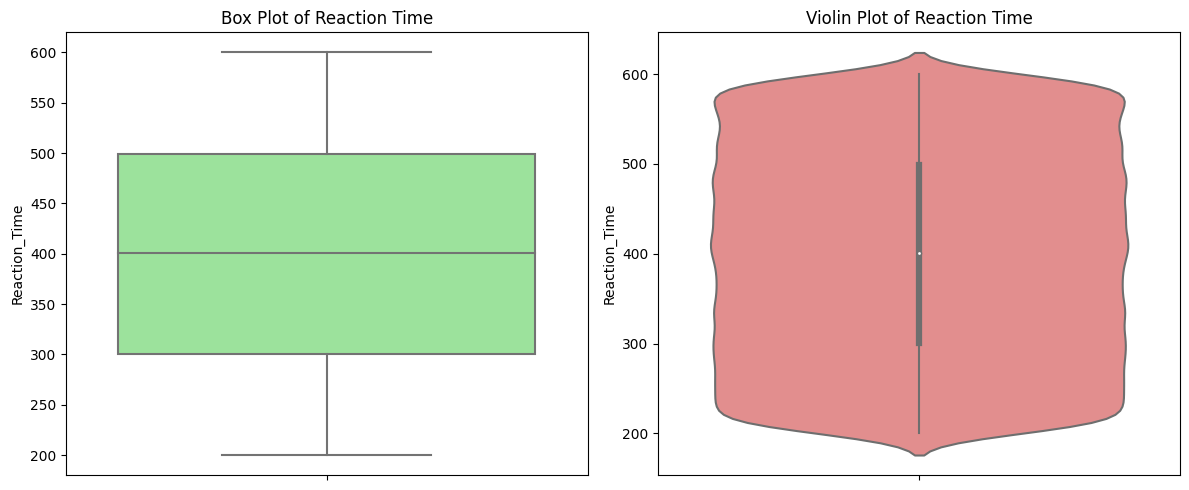

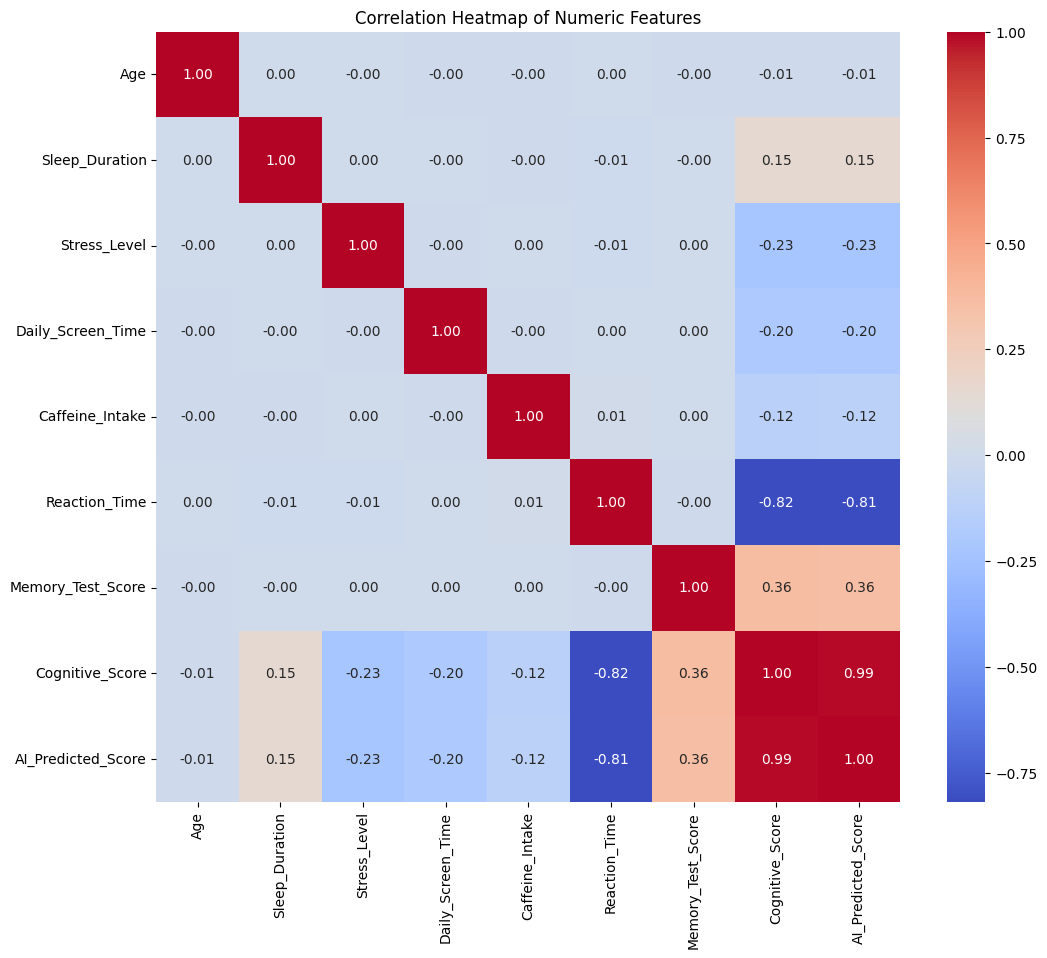

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

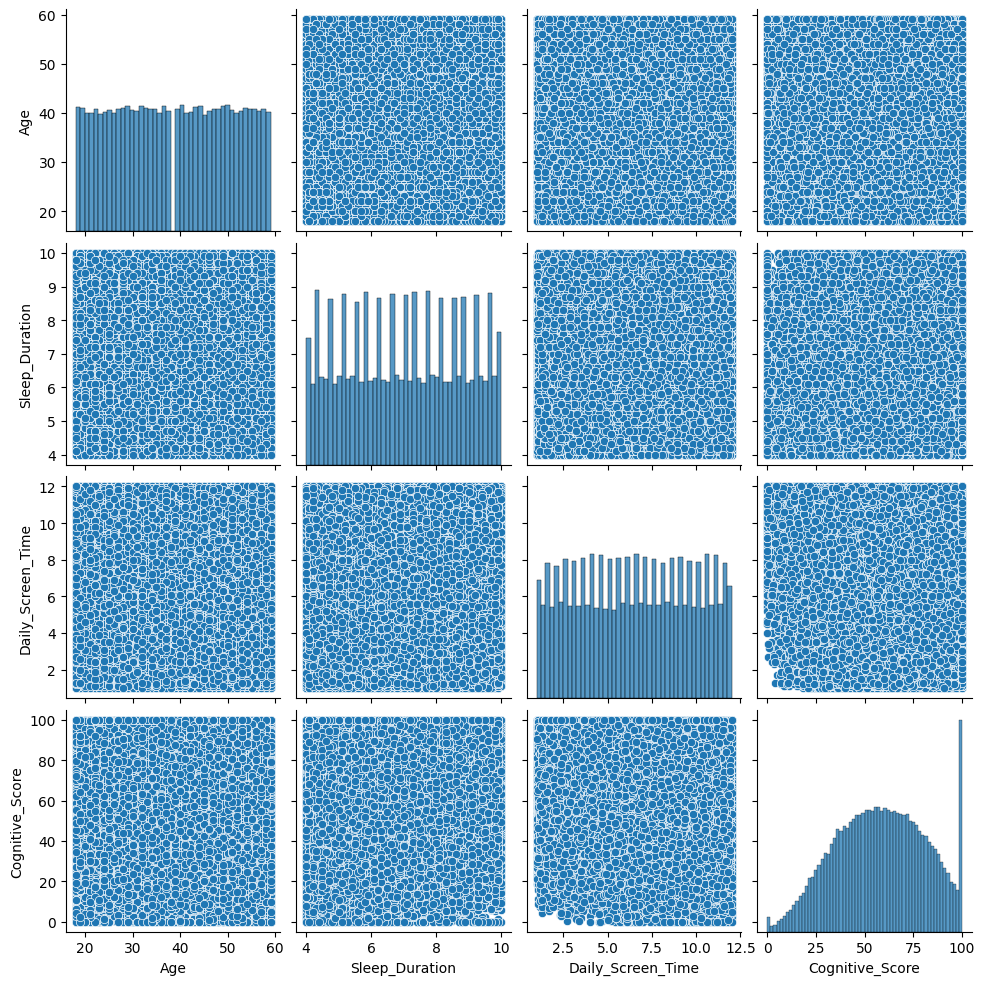

In [6]:
numeric_df = df.select_dtypes(include=[np.number])


plt.figure(figsize=(12, 8))
for i, col in enumerate(['Age', 'Sleep_Duration', 'Daily_Screen_Time', 'Reaction_Time', 'Cognitive_Score'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(numeric_df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=numeric_df['Reaction_Time'], color='lightgreen')
plt.title('Box Plot of Reaction Time')

plt.subplot(1, 2, 2)
sns.violinplot(y=numeric_df['Reaction_Time'], color='lightcoral')
plt.title('Violin Plot of Reaction Time')

plt.tight_layout()
plt.show()

if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 10))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()


sns.pairplot(numeric_df[['Age', 'Sleep_Duration', 'Daily_Screen_Time', 'Cognitive_Score']])
plt.show()

1. Age (ranging from roughly 20-60 years)

2. Sleep Duration (measured in hours, ranging from 4-10)
3. Daily Screen Time (measured in hours, ranging from about 2-12)
4. Cognitive Score (ranging from 0-100)

The diagonal of the matrix shows the distribution of each variable:
- Age appears to have a relatively uniform distribution around 40 years

- Sleep Duration shows a distribution centered around 6-8 hours
- Daily Screen Time shows a distribution centered around 5-6 hours
- Cognitive Score shows a bell-shaped (normal) distribution with most scores falling between 25-75


Some notable observations:
1. The cognitive score distribution appears to be normally distributed, suggesting a natural variation in cognitive performance across the population

2. Sleep duration appears to have some concentration around the recommended 7-9 hours of sleep
3. Daily screen time shows variation but appears to have some concentration around 4-8 hours

This visualization is useful for identifying potential correlations and patterns between these variables that might affect cognitive performance.

In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Gender','Diet_Type','Exercise_Frequency']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

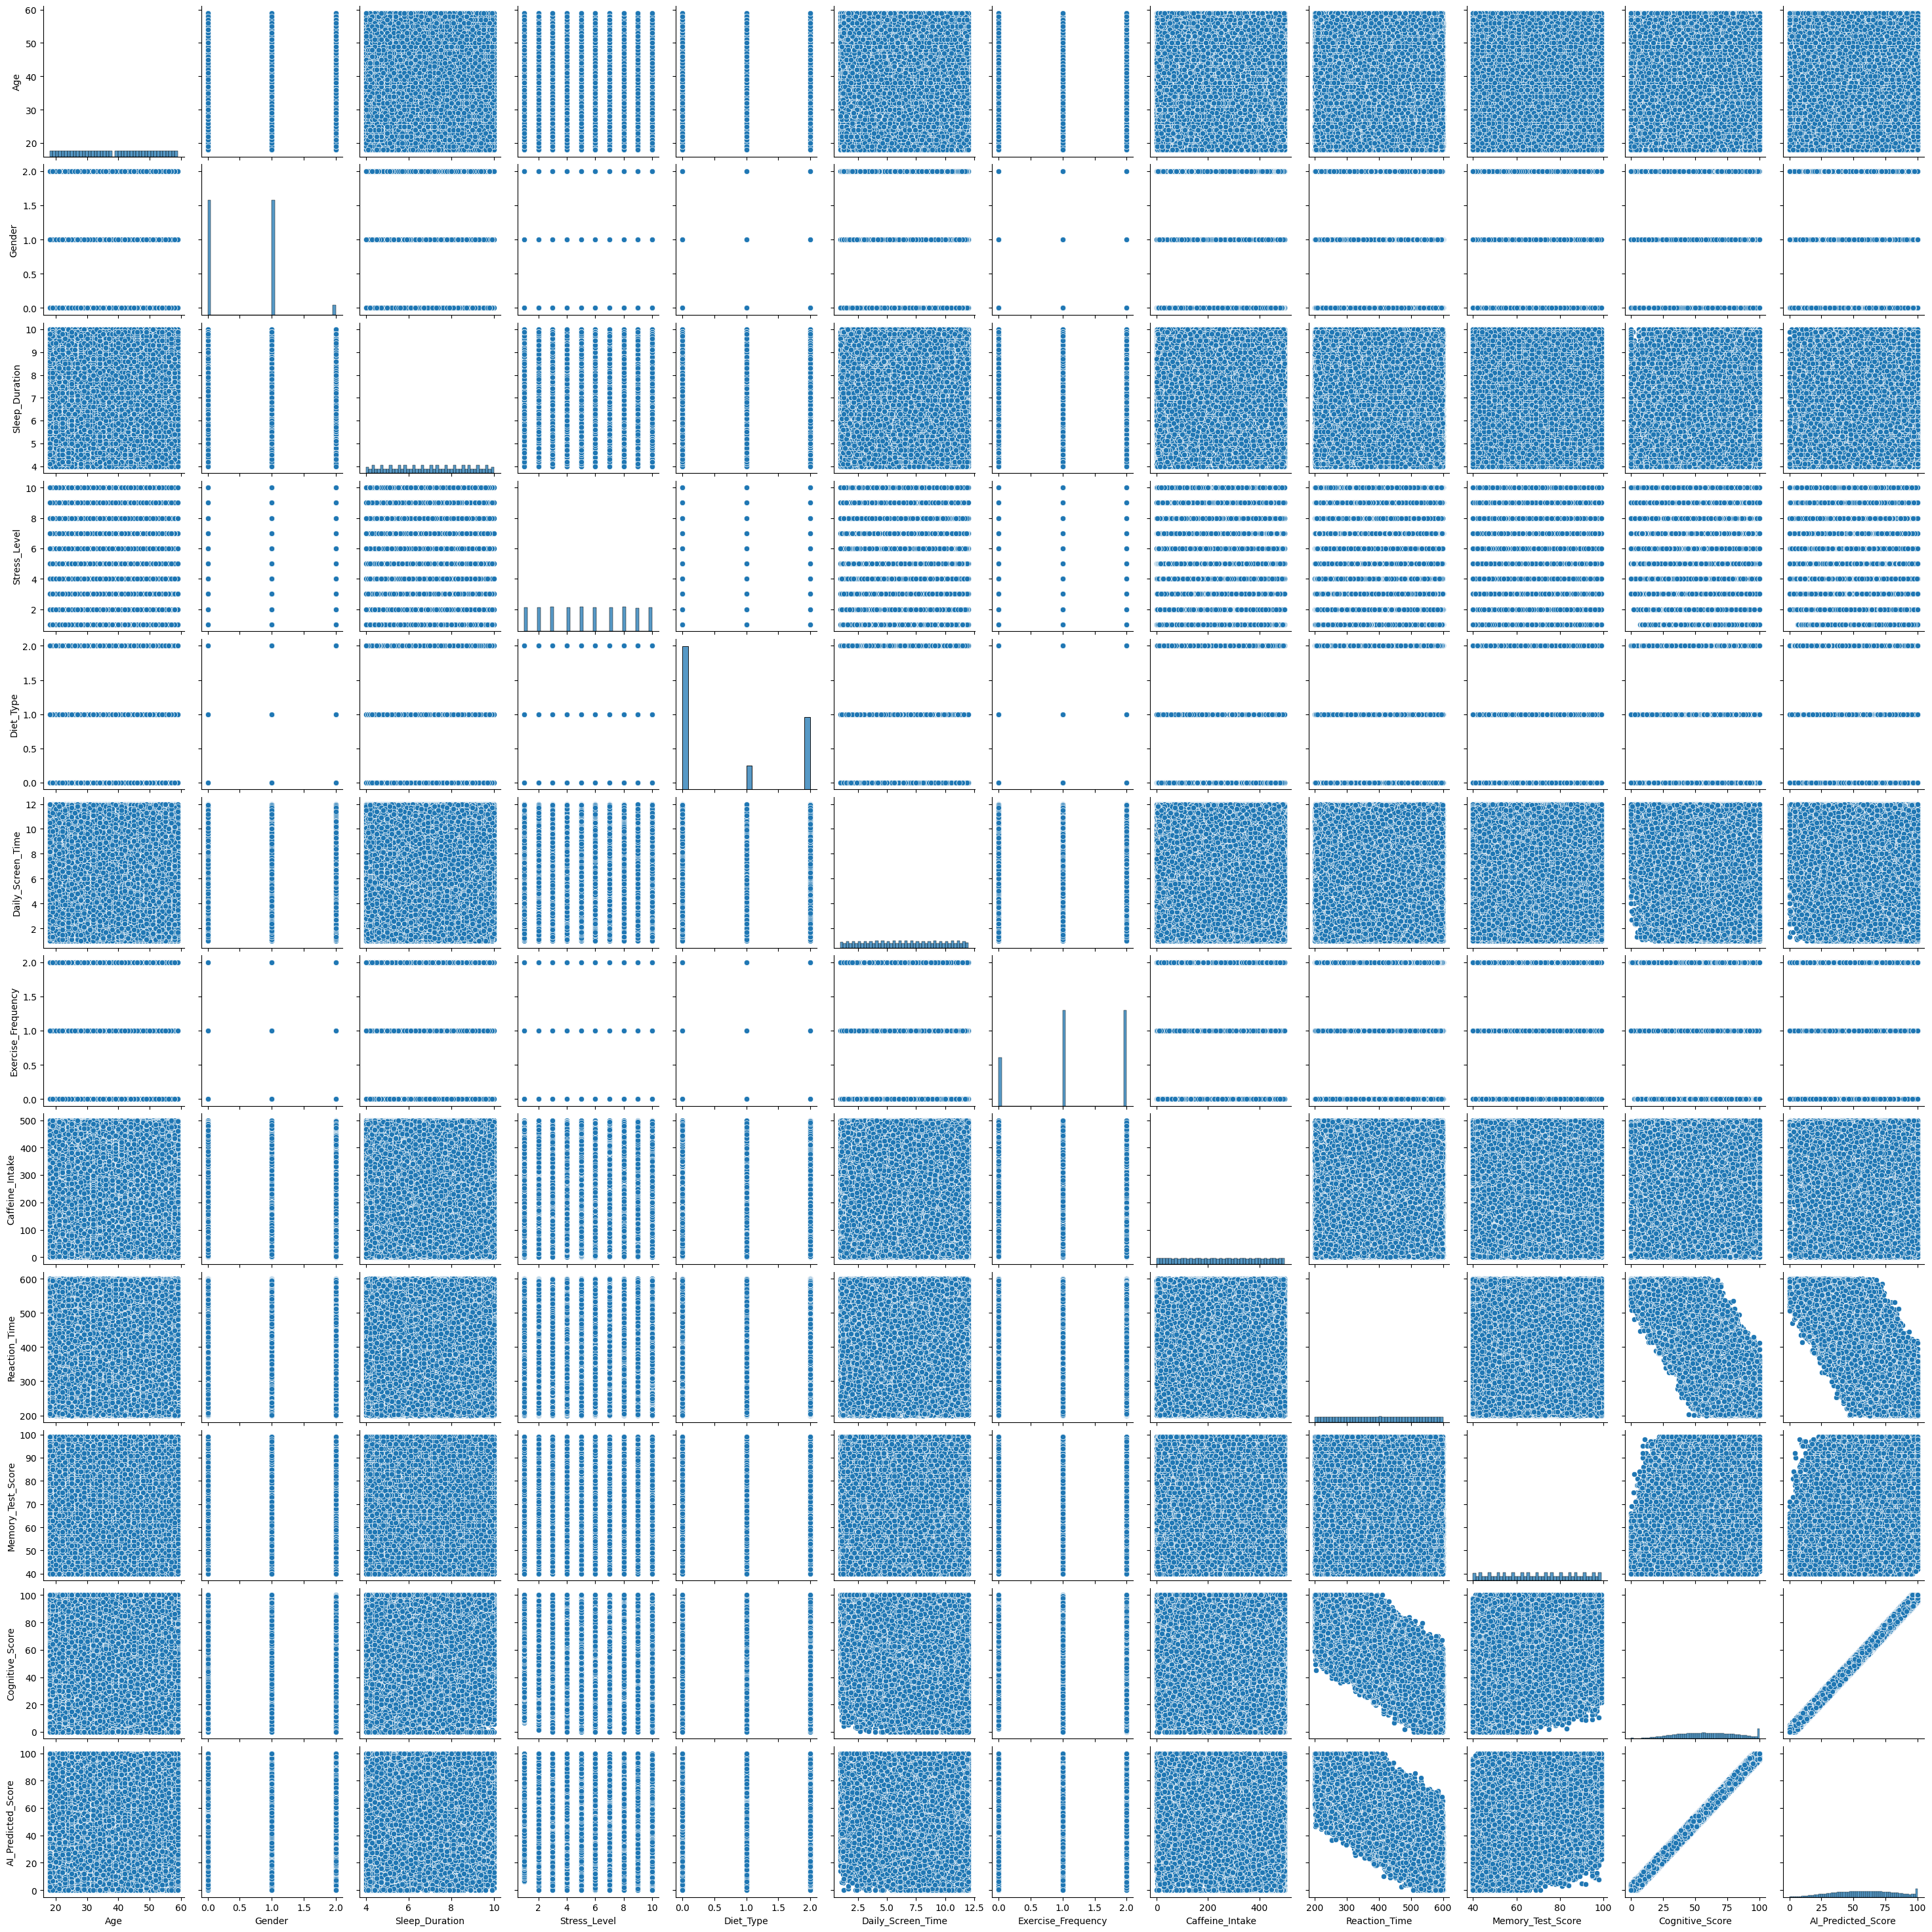

In [8]:
sns.pairplot(df)
plt.show()

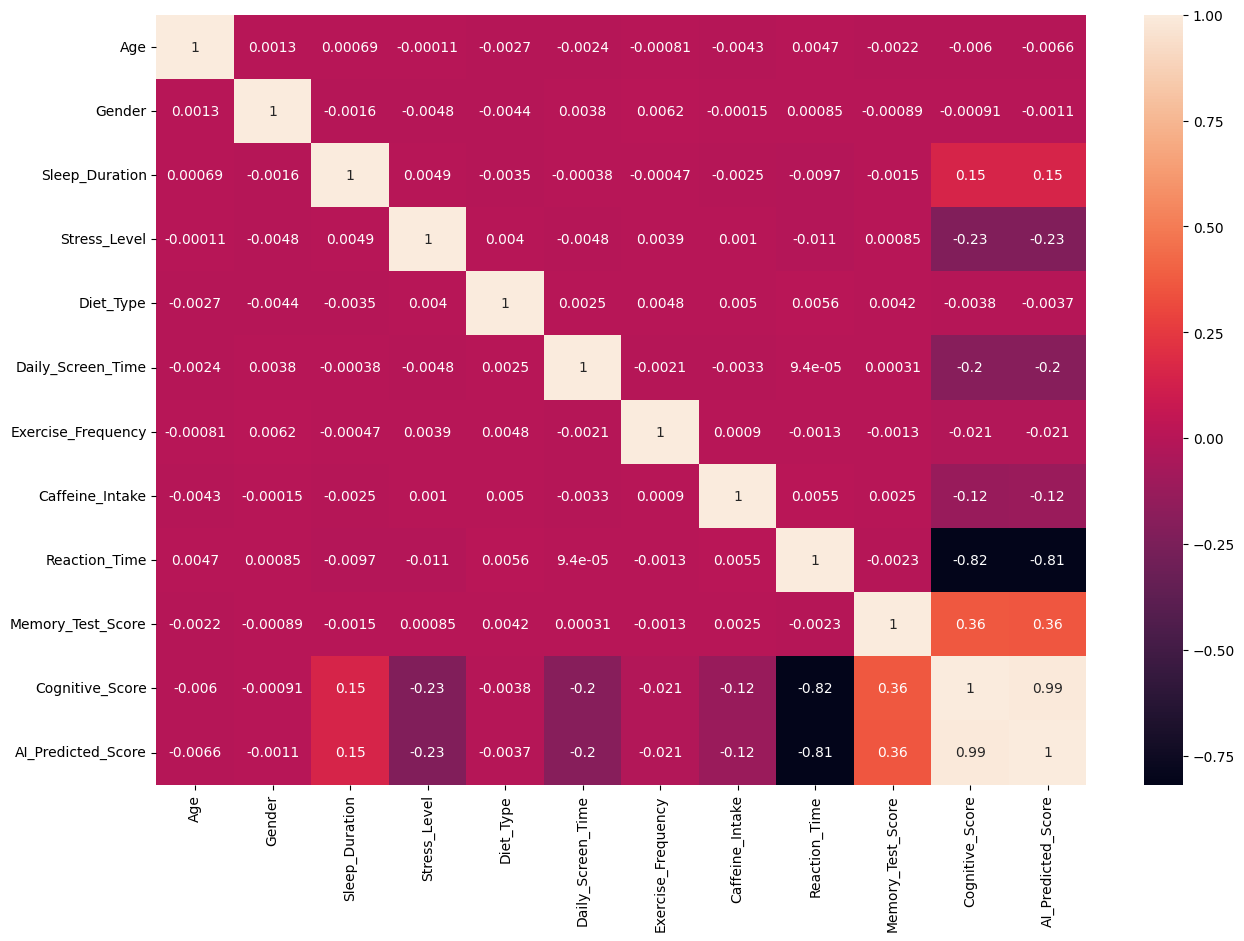

In [9]:
plt.figure(figsize=(15, 10))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()



Correlation between Stress Level and Cognitive Performance: -0.22763851488779094

Average Cognitive Performance by Stress Level:
Stress_Level
1     66.422091
2     64.916628
3     62.363771
4     60.931377
5     59.247057
6     56.957915
7     55.322553
8     53.771490
9     51.578379
10    50.100038
Name: Cognitive_Score, dtype: float64


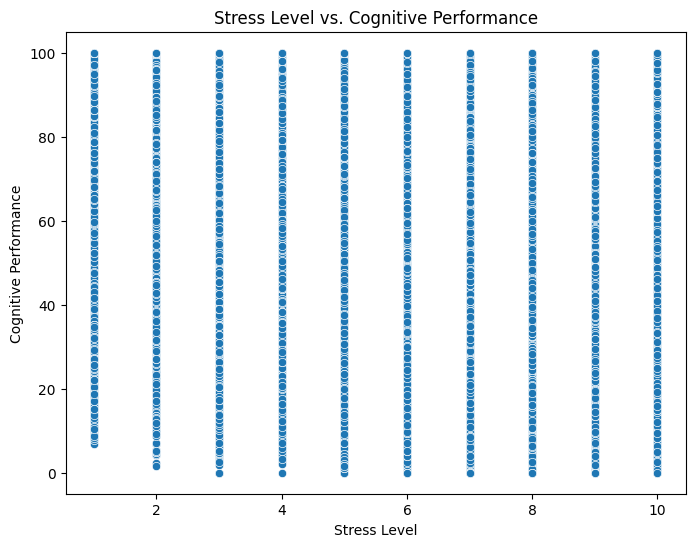

In [10]:
correlation_stress_performance = df['Stress_Level'].corr(df['Cognitive_Score'])
print(f"Correlation between Stress Level and Cognitive Performance: {correlation_stress_performance}")

stress_performance_groups = df.groupby('Stress_Level')['Cognitive_Score'].mean()
print("\nAverage Cognitive Performance by Stress Level:")
print(stress_performance_groups)


# Visualize the relationship using a scatter plot.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Stress_Level', y='Cognitive_Score', data=df)
plt.title('Stress Level vs. Cognitive Performance')
plt.xlabel('Stress Level')
plt.ylabel('Cognitive Performance')
plt.show()


Linear Regression Results:
Slope: -1.8319175903308758
Intercept: 68.23651503585012
R-squared: 0.051819293460319014
P-value: 0.0


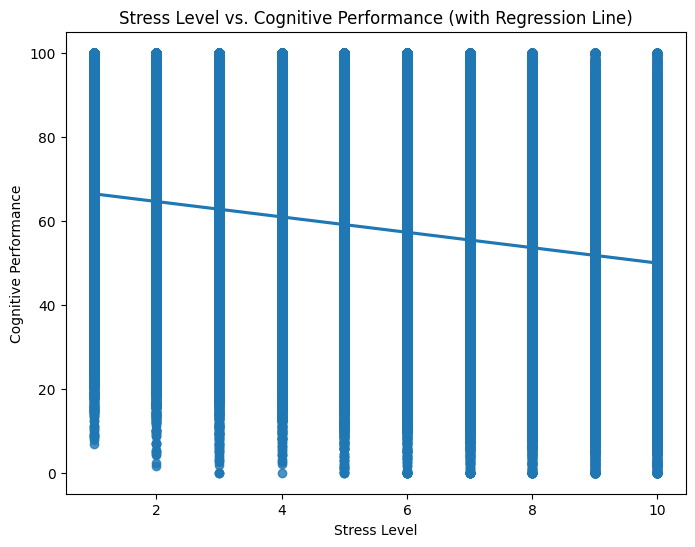

In [11]:
from scipy.stats import linregress

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Stress_Level'], df['Cognitive_Score'])

# Print the regression results
print(f"\nLinear Regression Results:")
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")

# Plot the regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Stress_Level', y='Cognitive_Score', data=df)
plt.title('Stress Level vs. Cognitive Performance (with Regression Line)')
plt.xlabel('Stress Level')
plt.ylabel('Cognitive Performance')
plt.show()

Correlation between Sleep Duration and Reaction Time: -0.009699093430420686

Average Reaction Time by Sleep Duration:
Sleep_Duration
4.0     408.046888
4.1     399.520091
4.2     405.743555
4.3     400.565828
4.4     404.998615
           ...    
9.6     392.441883
9.7     398.036248
9.8     401.382554
9.9     400.060362
10.0    398.873662
Name: Reaction_Time, Length: 61, dtype: float64


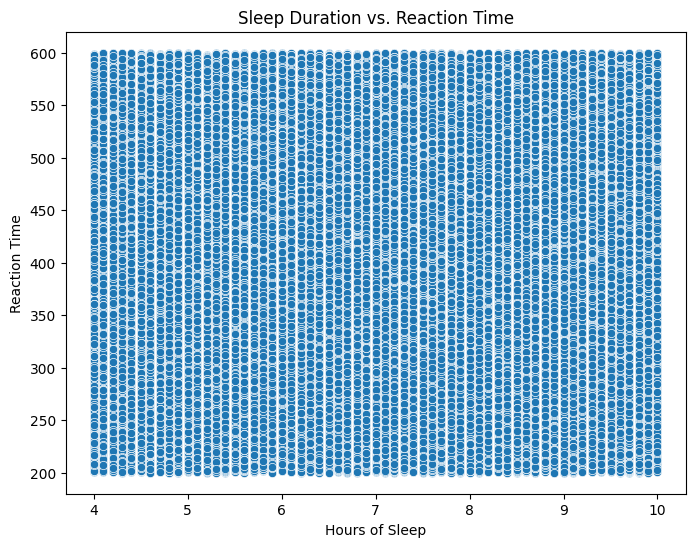

In [12]:
correlation_sleep_reaction = df['Sleep_Duration'].corr(df['Reaction_Time'])
print(f"Correlation between Sleep Duration and Reaction Time: {correlation_sleep_reaction}")

sleep_reaction_groups = df.groupby('Sleep_Duration')['Reaction_Time'].mean()
print("\nAverage Reaction Time by Sleep Duration:")
print(sleep_reaction_groups)

# Visualize the relationship using a scatter plot.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sleep_Duration', y='Reaction_Time', data=df)
plt.title('Sleep Duration vs. Reaction Time')
plt.xlabel('Hours of Sleep')
plt.ylabel('Reaction Time')
plt.show()

## Machine Learning - Regression

In [13]:
X=df.drop(['Cognitive_Score','AI_Predicted_Score'],axis=1)
y=df['Cognitive_Score']

               feature  importance
9        Reaction_Time    0.673310
10   Memory_Test_Score    0.131818
7   Exercise_Frequency    0.060048
4         Stress_Level    0.052549
6    Daily_Screen_Time    0.040872
3       Sleep_Duration    0.021866
8      Caffeine_Intake    0.015060
0              User_ID    0.001912
1                  Age    0.001734
5            Diet_Type    0.000432
2               Gender    0.000400


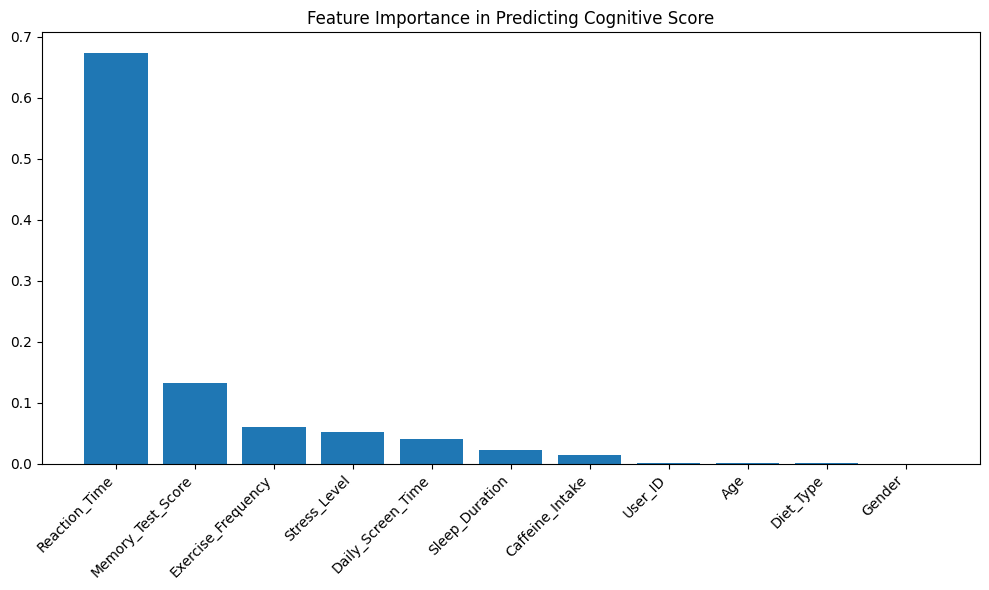

In [14]:
X_encoded = X.copy()

categorical_columns = X.select_dtypes(include=['object', 'category']).columns

le = LabelEncoder()
for column in categorical_columns:
    X_encoded[column] = le.fit_transform(X[column])

model = RandomForestRegressor(random_state=42)
model.fit(X_encoded, y)

# Get feature importances
feature_importances = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': model.feature_importances_
})


feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display results
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['feature'], feature_importances['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importance in Predicting Cognitive Score')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
models = {
    'Random Forest': RandomForestRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'Support Vector Regressor': SVR(),
    'Linear SVR': LinearSVR(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'XGB Regressor': XGBRegressor(),
}

# Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Regression Metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'MAE': mae,
        'R²': r2
    }

In [17]:
import tensorflow as tf

model=tf.keras.Sequential([
    tf.keras.layers.Input((len(X.columns),)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1),
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
            loss='mse',
            metrics=['mse', 'mae'])

model.summary()

2025-04-14 11:59:16.479597: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744631956.720727      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744631956.798177      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-14 11:59:31.899620: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,993 (19.50 KB)

 Trainable params: 4,993 (19.50 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_mse',  # Metric to monitor
    patience=10,         # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restores model weights from the best epoch
)

In [21]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1000,  # Large number since early stopping will intervene
    batch_size=32,
    callbacks=[early_stopping],  # Add the callback here
    verbose=0
)

In [22]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Regression Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

results['DNN'] = {
    'MSE': mse,
    'MAE': mae,
    'R²': r2
}

2000/2000 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0011 - mae: 0.0238 - mse: 0.0011
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
results_df = pd.DataFrame(results).T.sort_values('MSE')
results_df

MSE       MAE        R²
DNN                            0.001133  0.025710  0.999998
Support Vector Regressor       1.703800  0.677949  0.996793
XGB Regressor                  3.052281  1.387753  0.994254
Extra Trees Regressor          3.987148  1.561423  0.992494
GradientBoostingRegressor      4.741204  1.689104  0.991074
Random Forest                  6.680435  2.049292  0.987424
Decision Tree                 24.968765  3.916412  0.952995
K-Nearest Neighbors           30.160300  4.365259  0.943222
Linear Regression             35.929117  5.692819  0.932361
Ridge Regression              35.929158  5.692798  0.932361
Lasso Regression              42.166273  5.652308  0.920620
AdaBoost Regressor            46.239959  5.497592  0.912951
Linear SVR                    67.681231  5.066096  0.872586
Passive Aggressive Regressor  92.732722  7.898618  0.825426